In [1]:
import sys
sys.path.insert(0, "C:\\Users\\bradm\\Computational physics II\\Exam\\cfdadvection\\cfdadvection")

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import advection as adv

# Error for all the slope limiters using a top hat profile

In [3]:
#list for error from diferent slope limiters

err_god = [] #godunov
err_unl = [] #unlimited
err_min = [] #minmod
err_mc = []  #MC
err_sb = []  #superbee
err_vl = []  #varleer

#We will analize the error dependency on number of cells
N = [10, 50, 100, 200, 500]


#x liimits
xmin = 0.0
xmax = 1.0
# number of gosth cells on each side
ng = 2

for nx in N:
    g = adv.Grid1(ng, nx, xmin=xmin, xmax=xmax)
    g.fill_bcs()
    u = 1.0
    ##### Unlimited #####
    s = adv.Simulation(g, u, c = 0.8, slope_type="unlimited")
    s.initial_conditions("tophat")
    ainit = s.grid.a.copy()
    s.time_loop(n_periods=5)
    err_unl.append(g.norm(g.a - ainit))   #append the norm error

    ##### Minmod #####
    s = adv.Simulation(g, u, c =0.8, slope_type="minmod")
    s.initial_conditions("tophat")
    s.time_loop(n_periods=5)
    err_min.append(g.norm(g.a - ainit))

    ##### godunov #####
    s = adv.Simulation(g, u, c =0.8, slope_type="godunov")
    s.initial_conditions("tophat")
    s.time_loop(n_periods=5)
    err_god.append(g.norm(g.a - ainit)) #append the norm error

    ##### MC #####
    s = adv.Simulation(g, u, c =0.8, slope_type="MC")
    s.initial_conditions("tophat")
    s.time_loop(n_periods=5)
    err_mc.append(g.norm(g.a - ainit))  #append the norm error

    ##### superbee #####
    s = adv.Simulation(g, u, c =0.8, slope_type="superbee")
    s.initial_conditions("tophat")
    s.time_loop(n_periods=5)
    err_sb.append(g.norm(g.a - ainit)) #append the norm error
    
    ##### VarLeer #####
    s = adv.Simulation(g, u, c =0.8, slope_type="varleer")
    s.initial_conditions("tophat")
    s.time_loop(n_periods=5)
    err_vl.append(g.norm(g.a - ainit))  #append the norm error




#plt.savefig("fv-advect.pdf")

### Plots

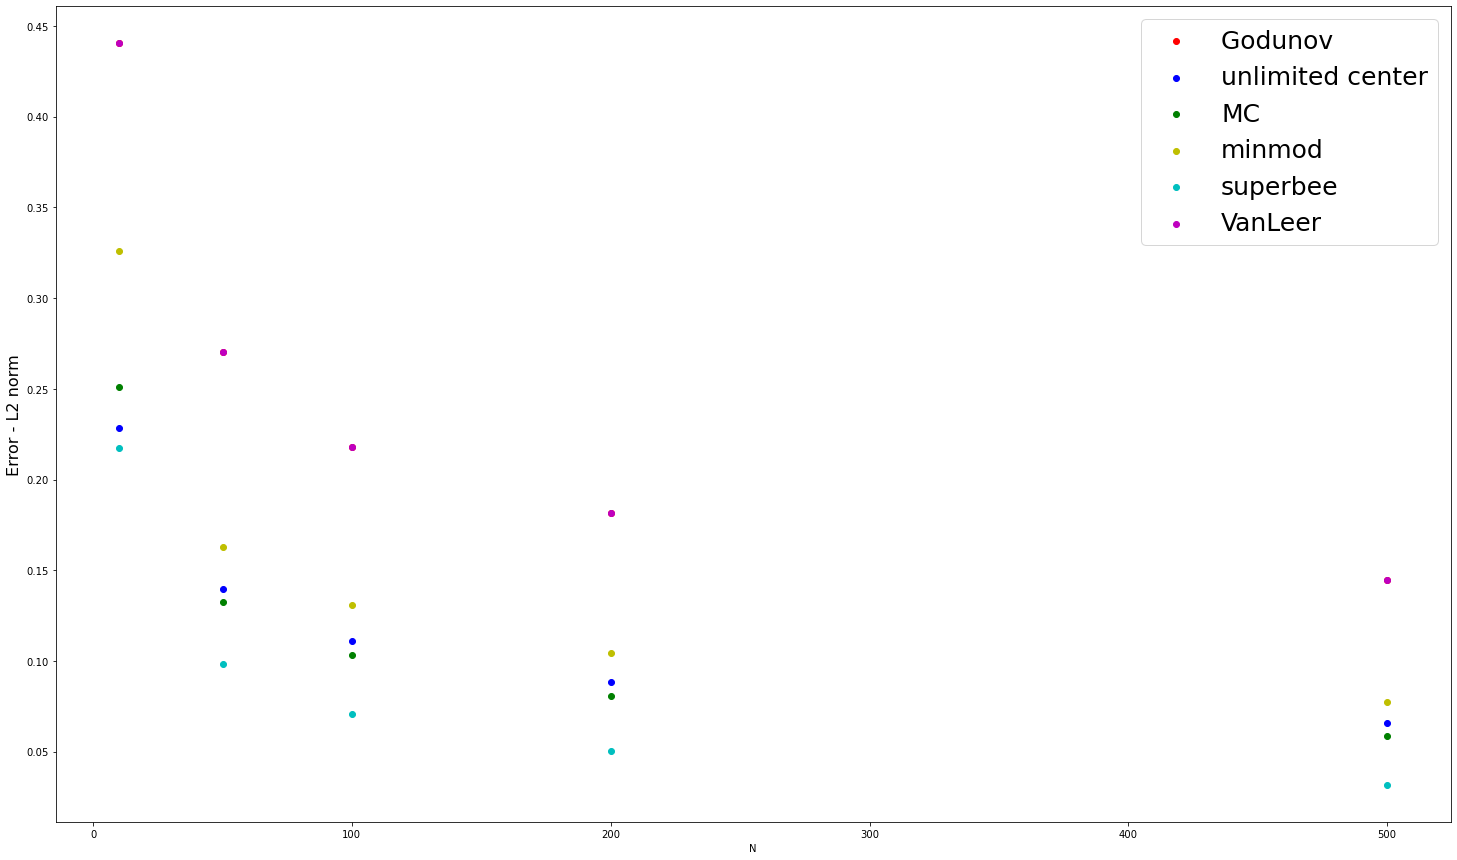

In [7]:


plt.figure(figsize=(25,15))

plt.scatter(np.array(N, dtype=np.float64), np.array(err_god), label="Godunov ", color="r")
plt.scatter(np.array(N, dtype=np.float64), np.array(err_unl), label="unlimited center", color="b")
plt.scatter(np.array(N, dtype=np.float64), np.array(err_mc), label="MC", color="g")
plt.scatter(np.array(N, dtype=np.float64), np.array(err_min), label="minmod", color="y")
plt.scatter(np.array(N, dtype=np.float64), np.array(err_sb), label="superbee", color="c")
plt.scatter(np.array(N, dtype=np.float64), np.array(err_vl), label="VanLeer", color="m")

plt.xlabel("N")
plt.ylabel("Error - L2 norm", fontsize=16)

plt.legend( loc="best", fontsize=25)
plt.savefig('outputfolder/l2.png', bbox_inches='tight')

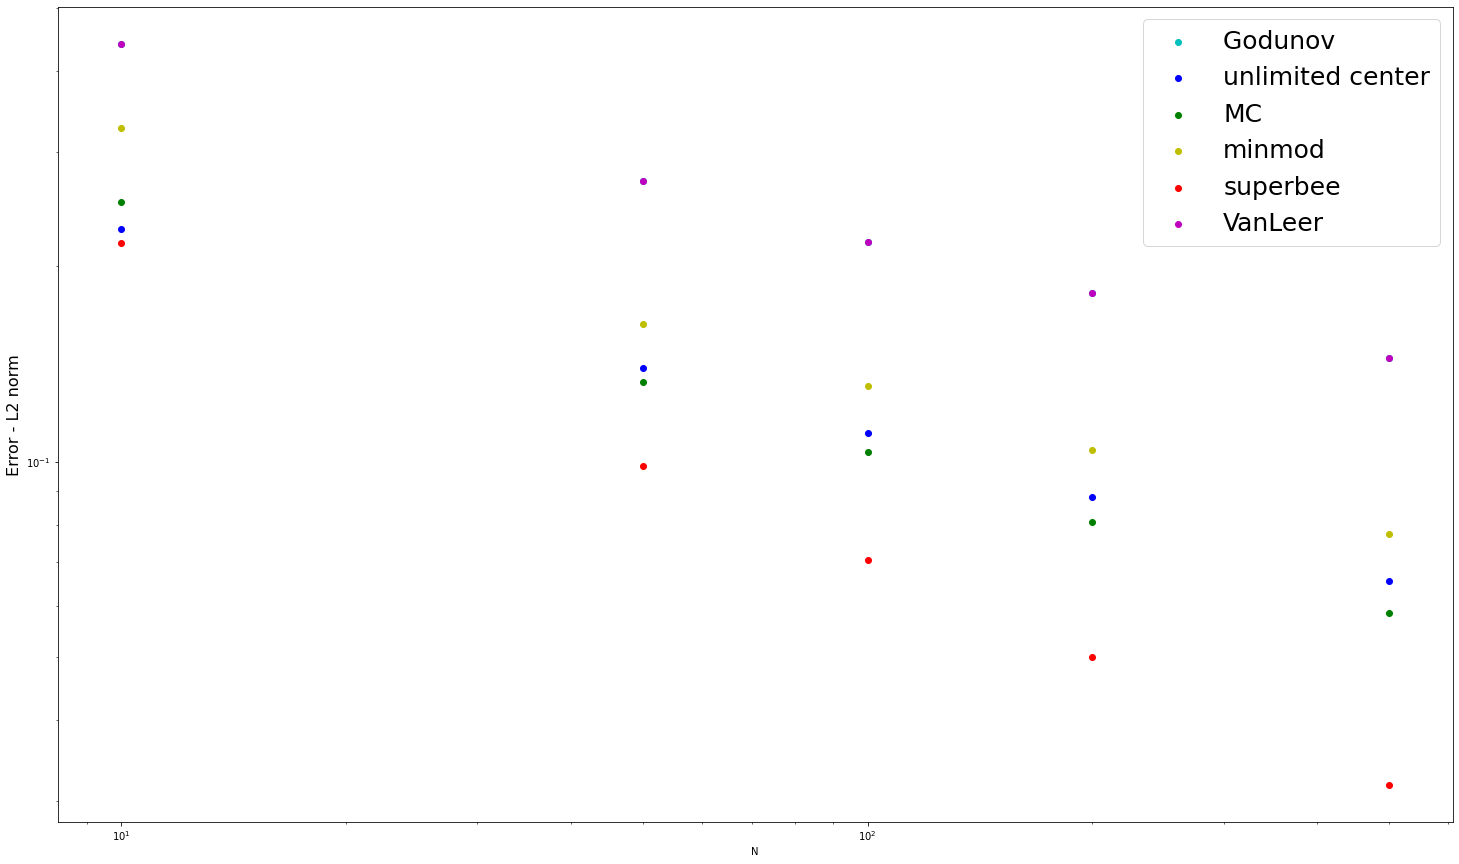

In [9]:
# Using log log scales

plt.figure(figsize=(25,15))

plt.scatter(np.array(N, dtype=np.float64), np.array(err_god), label="Godunov ", color="c")
plt.scatter(np.array(N, dtype=np.float64), np.array(err_unl), label="unlimited center", color="b")
plt.scatter(np.array(N, dtype=np.float64), np.array(err_mc), label="MC", color="g")
plt.scatter(np.array(N, dtype=np.float64), np.array(err_min), label="minmod", color="y")
plt.scatter(np.array(N, dtype=np.float64), np.array(err_sb), label="superbee", color="r")
plt.scatter(np.array(N, dtype=np.float64), np.array(err_vl), label="VanLeer", color="m")

#get the current axes in log log scale
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')

plt.xlabel("N")
plt.ylabel("Error - L2 norm", fontsize=16)

plt.legend( loc="best", fontsize = 25)
plt.savefig('outputfolder/l2-loglog.png', bbox_inches='tight')

## Discussion

From the errors we can appreciate that "superbee" perfomrs the best. At few number of cells the slopes perform similar, but when the greater the number of cells the more notoriuos is the error between the actual value and the calculated using the slopes.    